In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

* Use Adam
* Xavier initialization
* Batch normalization
* Dropout
* mini-batch

In [2]:
#train = pd.read_csv('house prediction data/train_cleaned.csv')
#test = pd.read_csv('house prediction data/test_cleaned.csv')

#train = pd.read_csv('house prediction data/other_preprocessed_train.csv')
#test = pd.read_csv('house prediction data/other_preprocessed_test.csv')

train = pd.read_csv('house prediction data/other_preprocessed_box_cox_train.csv')
test = pd.read_csv('house prediction data/other_preprocessed_box_cox_test.csv')

print(train.shape)
print(test.shape)

(1458, 221)
(1459, 221)


In [3]:
features = list(train.columns)

target = 'SalePrice'
features.remove(target)

train_x = train[features]
train_y = train[target]
test_x = test[features]

train_num = train_x.shape[0]
test_num = test_x.shape[1]

all_x = pd.concat([train_x, test_x])

# Use ANN to train with multiple features

In [4]:
from tf_ann import tf_ann

In [6]:
from cross_valid_api import cross_validate, root_mean_squred_error

### Inspired by the note https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset, which use elasticnet with l1 and l2 penalty and find out it doesn't need l2 compensate term.

In this case, there are too many features, using too many of them on small data could strongly hurt the generalization and hence cause much worse performance (larger rmse) on the validation set. Even though commonly used L2, dropout, batch normalization and so on can could help prevent the overfit confition; however using l1 regularization can have built-in feature selection to concentrate weights on real important features, which should be of more help in this case (small data + plenty of features). Maybe we can try to do PCA before training as well.

> L1 have built-in feature selection + sparse output (math + intuition): http://neuralnetworksanddeeplearning.com/chap3.html#overfitting_and_regularization 

### observation of hyperparameters

A lot of trials are not shown here.
For ann, there are too many hyper-params and it is hard to know what settings could have the best performance and how one hyperparameter affects another. 
Hence, instead of using grid-search, I randomly sampled several parameters to test.

I found that ANN perform poorly when:
* reg_loss_weight < 0.05 => not enough regularization, overfit, i.e. high valid set error w.r.t. train set
* bn decay rate > 0.9 => bad as well
* more layers with less l1_ratio
* it's ok to have high reg_loss_weight
* sigmoid function as activation function is not good

hence, focus on (reg_loss_weight >= 0.05) && (bn_decay_rate <= 0.9)

In [7]:
from sklearn.model_selection import train_test_split

In [7]:
ann_model = tf_ann(learning_rate= 0.01,
                    lr_decay_step = 20000,
                    lr_decay_rate = .1,
                    bn_decay_rate = 0.5,
                    reg_loss_weight = 0.8,
                    l1_ratio = 0.5,
                    num_epochs = 40000, 
                    minibatch_size = 512,
                    layer_count = 3, 
                    hidden_neuron =  [64, 32],
                    drop_rates = [0.0, 0.0, 0.0],
                    print_cost = True, # don't want to print cost during cv
                    profiling = False)

Cost after 100 epochs: 29.06490
Trainning set rmse: 1.00415
Validation set rmse: 1.31201
Remaining time: 0:6:39 

Cost after 200 epochs: 22.65662
Trainning set rmse: 0.242541
Validation set rmse: 0.261626
Remaining time: 0:6:38 

Cost after 300 epochs: 19.65699
Trainning set rmse: 0.230416
Validation set rmse: 0.274417
Remaining time: 0:6:37 

Cost after 400 epochs: 18.36637
Trainning set rmse: 0.394259
Validation set rmse: 0.427262
Remaining time: 0:6:36 

Cost after 500 epochs: 20.65866
Trainning set rmse: 0.307487
Validation set rmse: 0.387177
Remaining time: 0:6:35 

Cost after 600 epochs: 17.42361
Trainning set rmse: 0.176561
Validation set rmse: 0.185684
Remaining time: 0:6:34 

Cost after 700 epochs: 16.96490
Trainning set rmse: 0.181005
Validation set rmse: 0.196701
Remaining time: 0:6:33 

Cost after 800 epochs: 19.51865
Trainning set rmse: 0.287294
Validation set rmse: 0.291292
Remaining time: 0:13:4 

Cost after 900 epochs: 17.66772
Trainning set rmse: 0.302791
Validation se

Cost after 5400 epochs: 15.52390
Trainning set rmse: 0.333473
Validation set rmse: 0.335078
Remaining time: 0:5:46 

Cost after 5500 epochs: 15.46612
Trainning set rmse: 0.167469
Validation set rmse: 0.175769
Remaining time: 0:5:45 

Cost after 5600 epochs: 15.53748
Trainning set rmse: 0.193328
Validation set rmse: 0.203874
Remaining time: 0:5:44 

Cost after 5700 epochs: 15.32486
Trainning set rmse: 0.159485
Validation set rmse: 0.166282
Remaining time: 0:5:43 

Cost after 5800 epochs: 14.99694
Trainning set rmse: 0.1827
Validation set rmse: 0.187122
Remaining time: 0:5:42 

Cost after 5900 epochs: 15.24951
Trainning set rmse: 0.278625
Validation set rmse: 0.280291
Remaining time: 0:5:41 

Cost after 6000 epochs: 15.38704
Trainning set rmse: 0.194451
Validation set rmse: 0.187562
Remaining time: 0:5:40 

Cost after 6100 epochs: 15.06747
Trainning set rmse: 0.243294
Validation set rmse: 0.23491
Remaining time: 0:5:39 

Cost after 6200 epochs: 15.56771
Trainning set rmse: 0.221089
Valid

Cost after 10700 epochs: 1.78327
Trainning set rmse: 0.139111
Validation set rmse: 0.155384
Remaining time: 0:4:53 

Cost after 10800 epochs: 1.83636
Trainning set rmse: 0.141436
Validation set rmse: 0.155143
Remaining time: 0:4:52 

Cost after 10900 epochs: 1.71657
Trainning set rmse: 0.15066
Validation set rmse: 0.1643
Remaining time: 0:4:51 

Cost after 11000 epochs: 1.64901
Trainning set rmse: 0.136673
Validation set rmse: 0.154311
Remaining time: 0:4:50 

Cost after 11100 epochs: 1.91282
Trainning set rmse: 0.170178
Validation set rmse: 0.177659
Remaining time: 0:4:49 

Cost after 11200 epochs: 1.55684
Trainning set rmse: 0.134584
Validation set rmse: 0.154109
Remaining time: 0:4:48 

Cost after 11300 epochs: 1.78010
Trainning set rmse: 0.144986
Validation set rmse: 0.160771
Remaining time: 0:4:47 

Cost after 11400 epochs: 1.96417
Trainning set rmse: 0.1704
Validation set rmse: 0.183649
Remaining time: 0:4:46 

Cost after 11500 epochs: 1.83952
Trainning set rmse: 0.137444
Validat

Cost after 16000 epochs: 2.09118
Trainning set rmse: 0.163354
Validation set rmse: 0.171278
Remaining time: 0:4:0 

Cost after 16100 epochs: 1.93775
Trainning set rmse: 0.139841
Validation set rmse: 0.156953
Remaining time: 0:3:59 

Cost after 16200 epochs: 1.91683
Trainning set rmse: 0.14308
Validation set rmse: 0.161036
Remaining time: 0:3:58 

Cost after 16300 epochs: 2.01093
Trainning set rmse: 0.138083
Validation set rmse: 0.155697
Remaining time: 0:3:57 

Cost after 16400 epochs: 1.82169
Trainning set rmse: 0.144176
Validation set rmse: 0.159212
Remaining time: 0:3:56 

Cost after 16500 epochs: 1.95132
Trainning set rmse: 0.140267
Validation set rmse: 0.159768
Remaining time: 0:3:55 

Cost after 16600 epochs: 2.22236
Trainning set rmse: 0.318448
Validation set rmse: 0.325661
Remaining time: 0:3:54 

Cost after 16700 epochs: 2.18599
Trainning set rmse: 0.27901
Validation set rmse: 0.283375
Remaining time: 0:3:53 

Cost after 16800 epochs: 1.97414
Trainning set rmse: 0.150672
Valid

Cost after 21300 epochs: 0.42993
Trainning set rmse: 0.111792
Validation set rmse: 0.128378
Remaining time: 0:3:7 

Cost after 21400 epochs: 0.48710
Trainning set rmse: 0.115081
Validation set rmse: 0.13042
Remaining time: 0:3:6 

Cost after 21500 epochs: 0.44815
Trainning set rmse: 0.110257
Validation set rmse: 0.128073
Remaining time: 0:3:5 

Cost after 21600 epochs: 0.46857
Trainning set rmse: 0.111496
Validation set rmse: 0.129007
Remaining time: 0:3:4 

Cost after 21700 epochs: 0.46502
Trainning set rmse: 0.112304
Validation set rmse: 0.13057
Remaining time: 0:3:3 

Cost after 21800 epochs: 0.46858
Trainning set rmse: 0.112532
Validation set rmse: 0.131041
Remaining time: 0:3:2 

Cost after 21900 epochs: 0.44016
Trainning set rmse: 0.109334
Validation set rmse: 0.127022
Remaining time: 0:3:1 

Cost after 22000 epochs: 0.45077
Trainning set rmse: 0.108627
Validation set rmse: 0.12762
Remaining time: 0:3:0 

Cost after 22100 epochs: 0.43695
Trainning set rmse: 0.107992
Validation se

Cost after 26600 epochs: 0.44702
Trainning set rmse: 0.114958
Validation set rmse: 0.137562
Remaining time: 0:2:14 

Cost after 26700 epochs: 0.41840
Trainning set rmse: 0.103635
Validation set rmse: 0.123194
Remaining time: 0:2:13 

Cost after 26800 epochs: 0.46022
Trainning set rmse: 0.112316
Validation set rmse: 0.135291
Remaining time: 0:2:12 

Cost after 26900 epochs: 0.43311
Trainning set rmse: 0.109437
Validation set rmse: 0.131763
Remaining time: 0:2:11 

Cost after 27000 epochs: 0.43397
Trainning set rmse: 0.102285
Validation set rmse: 0.122196
Remaining time: 0:2:10 

Cost after 27100 epochs: 0.45136
Trainning set rmse: 0.102813
Validation set rmse: 0.121822
Remaining time: 0:2:9 

Cost after 27200 epochs: 0.44931
Trainning set rmse: 0.10424
Validation set rmse: 0.124026
Remaining time: 0:2:8 

Cost after 27300 epochs: 0.42229
Trainning set rmse: 0.102424
Validation set rmse: 0.12151
Remaining time: 0:2:7 

Cost after 27400 epochs: 0.44079
Trainning set rmse: 0.102295
Validat

Cost after 31900 epochs: 0.30445
Trainning set rmse: 0.100101
Validation set rmse: 0.121101
Remaining time: 0:1:21 

Cost after 32000 epochs: 0.31603
Trainning set rmse: 0.0999364
Validation set rmse: 0.120923
Remaining time: 0:1:20 

Cost after 32100 epochs: 0.30527
Trainning set rmse: 0.0999971
Validation set rmse: 0.121021
Remaining time: 0:1:19 

Cost after 32200 epochs: 0.30546
Trainning set rmse: 0.100231
Validation set rmse: 0.120992
Remaining time: 0:1:18 

Cost after 32300 epochs: 0.30708
Trainning set rmse: 0.100747
Validation set rmse: 0.12161
Remaining time: 0:1:17 

Cost after 32400 epochs: 0.30494
Trainning set rmse: 0.100124
Validation set rmse: 0.120913
Remaining time: 0:1:16 

Cost after 32500 epochs: 0.30046
Trainning set rmse: 0.0997736
Validation set rmse: 0.120484
Remaining time: 0:1:15 

Cost after 32600 epochs: 0.30863
Trainning set rmse: 0.100423
Validation set rmse: 0.121585
Remaining time: 0:1:14 

Cost after 32700 epochs: 0.31089
Trainning set rmse: 0.0998226

Cost after 37200 epochs: 0.31144
Trainning set rmse: 0.100232
Validation set rmse: 0.12098
Remaining time: 0:0:28 

Cost after 37300 epochs: 0.30237
Trainning set rmse: 0.0993672
Validation set rmse: 0.120188
Remaining time: 0:0:27 

Cost after 37400 epochs: 0.30490
Trainning set rmse: 0.0995859
Validation set rmse: 0.120617
Remaining time: 0:0:26 

Cost after 37500 epochs: 0.30657
Trainning set rmse: 0.0993886
Validation set rmse: 0.120529
Remaining time: 0:0:25 

Cost after 37600 epochs: 0.30985
Trainning set rmse: 0.0995856
Validation set rmse: 0.120227
Remaining time: 0:0:24 

Cost after 37700 epochs: 0.30383
Trainning set rmse: 0.0993363
Validation set rmse: 0.120425
Remaining time: 0:0:23 

Cost after 37800 epochs: 0.30768
Trainning set rmse: 0.0994082
Validation set rmse: 0.120353
Remaining time: 0:0:22 

Cost after 37900 epochs: 0.30095
Trainning set rmse: 0.0996727
Validation set rmse: 0.120955
Remaining time: 0:0:21 

Cost after 38000 epochs: 0.30517
Trainning set rmse: 0.099

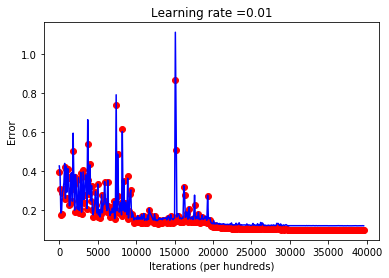

In [50]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.33, random_state=0)
ann_model.fit(X_train, y_train, X_valid=X_test, Y_valid=y_test)

In [51]:
ann_model = tf_ann(learning_rate= 0.01,
                    lr_decay_step = 20000,
                    lr_decay_rate = .1,
                    bn_decay_rate = 0.5,
                    reg_loss_weight = 0.8,
                    l1_ratio = 0.5,
                    num_epochs = 40000, 
                    minibatch_size = 512,
                    layer_count = 3, 
                    hidden_neuron =  [64, 32],
                    drop_rates = [0.0, 0.0, 0.0],
                    print_cost = False, # don't want to print cost during cv
                    profiling = False)
cross_validate(model= ann_model, X=train_x, y=train_y, fold_num=3, error_func=root_mean_squred_error)

fold  1  valid error:  0.129326043221
fold  2  valid error:  0.101372284832
fold  3  valid error:  0.118797329205
3  fold(s) avg. valid error:  0.116498552419


### final NN model

if the fold we're going to use is 5 kfold:

lr_decay_step becomes 30000 (was 20000 above) <br>

Since we want decay the learning rate by 0.1 every 10000 epoch. <br>
From above, there are 2 updates \( ceil\(1456* \( 2/3 \) / 512 \) for 3 fold cv\) for 1 epoch, so the learning rate decays for every 20000 updates. <br>
We're going to use 5 kfold to build meta features in the stacking models, there are hence 3 updates for 1 epoch, so the learning rate should decay for every 30000 updates. <br>


p.s. submitted test set score by ANN train on full dataset: 0.12017 (randk 397, ~20%)

In [8]:
ann_model = tf_ann(learning_rate= 0.01,
                    lr_decay_step = 20000,
                    lr_decay_rate = .1,
                    bn_decay_rate = 0.5,
                    reg_loss_weight = 0.8,
                    l1_ratio = 0.5,
                    num_epochs = 40000, 
                    minibatch_size = 512,
                    layer_count = 3, 
                    hidden_neuron =  [64, 32],
                    drop_rates = [0.0, 0.0, 0.0],
                    print_cost = False, # don't want to print cost during cv
                    profiling = False)

# Base models

## other base models: ElasticNet, Lasso, Kernel Ridge, Gradient boost, xgboost, LightGBM, random forest

In [9]:
from sklearn.linear_model import ElasticNet, ElasticNetCV, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import AffinityPropagation, MeanShift, KMeans
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

## First Stack

use 5 kfold out-of-fold predictions as output meta-features

In [30]:
ENet = ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=3)

In [31]:
lasso = Lasso(alpha =0.0005, random_state=1)

In [12]:
kr = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
#kr = KernelRidge(alpha=0.8, kernel='polynomial', degree=2, coef0=6.0)

In [32]:
g_boost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [33]:
xg_boost = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [34]:
lgbm = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [35]:
rf = RandomForestRegressor(n_jobs = 4, n_estimators=1200, 
                           max_depth=None, min_weight_fraction_leaf=0.0,
                           min_impurity_decrease = 0.0,
                           max_features='auto', 
                           random_state =5)


In [67]:
supervised_model_used = {
    "ann" : ann_model,
    "enet": ENet,
    #"lasso": lasso,
    "kernel ridge": kr,
    "gradient boost": g_boost,
    #"xgboost": xg_boost,
    #"lgbm" : lgbm,
    #"rf" : rf
}

In [37]:
semi_supervised_model_used = {
    #"knn_2" : KNeighborsRegressor(n_neighbors=2, weights='distance', n_jobs=2),
    #"knn_4" : KNeighborsRegressor(n_neighbors=4, weights='distance', n_jobs=2),
    "knn_8" : KNeighborsRegressor(n_neighbors=8, weights='distance', n_jobs=2),
    "knn_16" : KNeighborsRegressor(n_neighbors=16, weights='distance', n_jobs=2),
    "knn_32" : KNeighborsRegressor(n_neighbors=32, weights='distance', n_jobs=2),
    #"knn_64" : KNeighborsRegressor(n_neighbors=64, weights='distance', n_jobs=2),
    #"knn_128" : KNeighborsRegressor(n_neighbors=128, weights='distance', n_jobs=2)
}

In [38]:
unsupervised_model_used = {
    'affinity': AffinityPropagation(),
    'mean_shift': MeanShift(n_jobs = 2),
    'kmean_8': KMeans(n_clusters=8, n_jobs=2),
    'kmean_16': KMeans(n_clusters=16, n_jobs=2),
    'kmean_32': KMeans(n_clusters=32, n_jobs=2),
    #'kmean_64': KMeans(n_clusters=64, n_jobs=2),
    #'kmean_128': KMeans(n_clusters=128, n_jobs=2),
}

In [68]:
from stacking_models_api import StackingAveragedModels

In [69]:
sam = StackingAveragedModels(n_folds=5, target_col='SalePrice')

In [70]:
sam.stacked_fit(supervised_model_used, train_x, test_x, train_y, method='supervised', random_state=156)


 kernel ridge
rmse= 0.101699082863
rmse= 0.121143982767
rmse= 0.115234800043
rmse= 0.125109243782
rmse= 0.120932719702
Avg rmse =  0.116823965831

 ann
rmse= 0.0985851617482
rmse= 0.149469766569
rmse= 0.106085418851
rmse= 0.127586545854
rmse= 0.114799286553
Avg rmse =  0.119305235915

 enet
rmse= 0.101173590137
rmse= 0.118082497641
rmse= 0.106791164844
rmse= 0.120892587513
rmse= 0.11487887918
Avg rmse =  0.112363743863

 gradient boost
rmse= 0.0991490704516
rmse= 0.13000465683
rmse= 0.107215189303
rmse= 0.125333874021
rmse= 0.122528879697
Avg rmse =  0.11684633406


(      kernel ridge        ann       enet  gradient boost  SalePrice
 0        12.234604  12.251610  12.239046       12.252918  12.247699
 1        12.116293  12.123214  12.114305       12.081390  12.109016
 2        12.293865  12.280560  12.301690       12.292040  12.317171
 3        12.049715  12.028250  12.041225       11.988504  11.849405
 4        12.570143  12.567240  12.581881       12.603495  12.429220
 5        11.993251  11.982155  11.987056       11.957181  11.870607
 6        12.561527  12.514234  12.523466       12.538989  12.634606
 7        12.332268  12.290421  12.284318       12.271151  12.206078
 8        11.749201  11.762816  11.790300       11.819499  11.774528
 9        11.620294  11.663987  11.672379       11.763618  11.678448
 10       11.777606  11.774051  11.786738       11.751222  11.771444
 11       12.871007  12.867487  12.873013       12.758728  12.751303
 12       11.777227  11.791061  11.763603       11.811982  11.877576
 13       12.341450  12.324059  12

In [73]:
sam.stacked_fit(semi_supervised_model_used, train_x, test_x, train_y, method='semi-supervised')


 knn_16
rmse= 0.21151539309
rmse= 0.186210815827
rmse= 0.223229943395
rmse= 0.192884082694
rmse= 0.185436489376
Avg rmse =  0.199855344876

 knn_32
rmse= 0.223491838989
rmse= 0.194500418517
rmse= 0.240523983406
rmse= 0.199900266991
rmse= 0.198992620665
Avg rmse =  0.211481825713

 knn_8
rmse= 0.20508033836
rmse= 0.178925989295
rmse= 0.203054547717
rmse= 0.186252690184
rmse= 0.177364009906
Avg rmse =  0.190135515093


(      kernel ridge        ann       enet  gradient boost  SalePrice  \
 0        12.234604  12.251610  12.239046       12.252918  12.247699   
 1        12.116293  12.123214  12.114305       12.081390  12.109016   
 2        12.293865  12.280560  12.301690       12.292040  12.317171   
 3        12.049715  12.028250  12.041225       11.988504  11.849405   
 4        12.570143  12.567240  12.581881       12.603495  12.429220   
 5        11.993251  11.982155  11.987056       11.957181  11.870607   
 6        12.561527  12.514234  12.523466       12.538989  12.634606   
 7        12.332268  12.290421  12.284318       12.271151  12.206078   
 8        11.749201  11.762816  11.790300       11.819499  11.774528   
 9        11.620294  11.663987  11.672379       11.763618  11.678448   
 10       11.777606  11.774051  11.786738       11.751222  11.771444   
 11       12.871007  12.867487  12.873013       12.758728  12.751303   
 12       11.777227  11.791061  11.763603       11.811982  11.87

In [74]:
sam.stacked_fit(unsupervised_model_used, train_x, test_x, train_y, method='unsupervised')


 affinity

 kmean_16

 kmean_8

 kmean_32

 mean_shift


D:\Data-Analysis-Tool\house prediction\stacking_models_api.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.out_of_fold_predictions[self.target_col] = train_y


(      kernel ridge        ann       enet  gradient boost     knn_16  \
 0        12.234604  12.251610  12.239046       12.252918  12.278200   
 1        12.116293  12.123214  12.114305       12.081390  11.937374   
 2        12.293865  12.280560  12.301690       12.292040  12.303572   
 3        12.049715  12.028250  12.041225       11.988504  11.848672   
 4        12.570143  12.567240  12.581881       12.603495  12.442053   
 5        11.993251  11.982155  11.987056       11.957181  11.836473   
 6        12.561527  12.514234  12.523466       12.538989  12.327671   
 7        12.332268  12.290421  12.284318       12.271151  11.979231   
 8        11.749201  11.762816  11.790300       11.819499  11.664879   
 9        11.620294  11.663987  11.672379       11.763618  11.719662   
 10       11.777606  11.774051  11.786738       11.751222  11.762677   
 11       12.871007  12.867487  12.873013       12.758728  12.834083   
 12       11.777227  11.791061  11.763603       11.811982  11.90

In [75]:
sam.save_to_csv('stage_1_d2')

> for sanity check, the only different col should only be 'SalePrice' or None

In [49]:
a, b = sam.get_meta_train_test_dataframe()
a_cols = list(a.columns)
b_cols = list(b.columns)
print([col for col in a_cols if col not in b_cols])
print([col for col in b_cols if col not in a_cols])
print(a.shape)
print(b.shape)

['SalePrice']
[]
(1458, 157)
(1459, 156)


In [76]:
test_pred = sam.meta_fit(lasso)

meta model's training set mse=  0.108122231746 



In [77]:
submission = pd.DataFrame()
submission['SalePrice'] = test_pred
submission['SalePrice'] = np.expm1(submission['SalePrice'])
submission.to_csv('final_answer_d2.csv')

> I find it not using rf in the first layer but with nearest neighbor features help <br>


In [52]:
import copy

In [53]:
instance = copy.deepcopy(xg_boost)
instance.fit(train_x, train_y)
pred_xg = instance.predict(test_x)
print(np.sqrt(np.mean((instance.predict(train_x)-train_y)**2)))

0.0787989408313


In [54]:
instance = copy.deepcopy(lgbm)
instance.fit(train_x, train_y)
pred_lgbm = instance.predict(test_x)
print(np.sqrt(np.mean((instance.predict(train_x)-train_y)**2)))

0.0717642293168


In [55]:
instance = copy.deepcopy(rf)
instance.fit(train_x, train_y)
pred_rf = instance.predict(test_x)
print(np.sqrt(np.mean((instance.predict(train_x)-train_y)**2)))

0.0494885637604


In [78]:
# LB score: 0.11699, 0.11734, 0.11725

submission = pd.DataFrame()
submission['SalePrice_stack'] = test_pred
submission['SalePrice_xg'] = pred_xg
submission['SalePrice_lgbm'] = pred_lgbm
#submission['SalePrice'] = 0.7*test_pred + 0.15*pred_xg + 0.15*pred_lgbm

submission['SalePrice_stack'] = np.expm1(submission['SalePrice_stack'])
submission['SalePrice_xg'] = np.expm1(submission['SalePrice_xg'])
submission['SalePrice_lgbm'] = np.expm1(submission['SalePrice_lgbm'])

submission['SalePrice'] = 0.7*submission['SalePrice_stack'] + 0.15*submission['SalePrice_xg'] + 0.15*submission['SalePrice_lgbm']
submission['SalePrice'].astype('float')
submission.to_csv('final_answer_d2_essemble.csv')

## Second Stack

use 3 kfold out-of-fold predictions as output meta-features

In [217]:
train_2 = pd.read_csv("stage_1_d2_meta_train.csv", encoding='utf-8')
test_2 = pd.read_csv("stage_1_d2_meta_test.csv", encoding='utf-8')

stage_2_features = list(train_2.columns)
stage_2_features.remove(target)

train_2_x = train_2[stage_2_features]
train_2_y = train_2[target]
test_2_x = test_2[stage_2_features]

print(train_2_x.shape, test_2_x.shape)

(1458, 156) (1459, 156)


In [218]:
ENet_2 = ElasticNet(alpha=0.0005, l1_ratio=0.87, random_state=3, max_iter=100000)
params = {
    'alpha': [0.005, 0.001, 0.0008, 0.0005, 0.0003],
    'l1_ratio': [1.0, 0.8, 0.6]
}
gs =  GridSearchCV(estimator=ENet_2, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_2_x, train_2_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))
#cross_validate(model= ENet, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)

{'alpha': 0.001, 'l1_ratio': 1.0} 0.110275220319


In [219]:
ENet_2 = ElasticNet(alpha=.001, l1_ratio=1.0, random_state=3, max_iter=100000)

In [222]:
lasso_2 = Lasso(random_state=1, max_iter=100000)
params = {
    'alpha': [0.2, 0.1, 0.05, 0.001, 0.0008, 0.0005, 0.00025, 0.0001],
}
gs =  GridSearchCV(estimator=lasso_2, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))
#cross_validate(model= lasso, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)

{'alpha': 0.0005} 0.113215071591


In [224]:
lasso_2 = Lasso(alpha= 0.0005, random_state=1, max_iter=100000)

In [33]:
g_boost_2 = GradientBoostingRegressor(n_estimators=1200, learning_rate=0.01,
                                   max_depth=3, max_features='sqrt',
                                   #min_samples_leaf=3,  
                                   loss='huber', random_state =5)
params = {
    #'learning_rate': [0.05, 0.01, 0.005],
    'max_depth' : [2, 4, 6, 8, 12, 16],
    'min_samples_leaf' : [2, 3, 4, 6, 8]
}
gs =  GridSearchCV(estimator=g_boost_2, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))

{'max_depth': 4, 'min_samples_leaf': 3} 0.116718715101


In [34]:
g_boost_2 = GradientBoostingRegressor(n_estimators=1200, learning_rate=0.01,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=3,  
                                   loss='huber', random_state =5)
params = {
    'learning_rate': [0.05, 0.01, 0.005],
    #'max_depth' : [3.0, 4.0, 5.0, 6.0, 7.0],
    #'min_samples_leaf' : [2, 3, 4]
}
gs =  GridSearchCV(estimator=g_boost_2, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))

{'learning_rate': 0.05} 0.115238463682


In [35]:
g_boost_2 = GradientBoostingRegressor(n_estimators=1200, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=4,  
                                   loss='huber', random_state =5)

In [36]:
xg_boost_2 = xgb.XGBRegressor(n_estimators=2200, learning_rate=0.1, 
#                            max_depth=6, min_child_weight=1.0,
#                            gamma=0.0,
#                            subsample=1.0, colsample_bytree=0.4,
#                            reg_alpha=0.0, reg_lambda=0.0,
                            silent=1,
                            nthread=4,
                            eval_metric = 'rmse',
                            tree_method = 'exact',
                            grow_policy = 'lossguide',
                            booster = 'gbtree'
                            )
#cross_validate(model= xg_boost, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)
params = {
    'max_depth' : [1, 2, 3, 4, 8, 16],
    'min_child_weight' : [0, 0.5, 1.5, 2.0, 2.5]
}
gs =  GridSearchCV(estimator=xg_boost_2, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))
#cross_validate(model= xg_boost, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)

{'min_child_weight': 1.5, 'max_depth': 1} 0.120433544067


In [37]:
xg_boost_2 = xgb.XGBRegressor(n_estimators=2200, learning_rate=0.1, 
                            max_depth=1, min_child_weight=1.5,
#                            gamma=0.0,
#                            subsample=1.0, colsample_bytree=0.4,
#                            reg_alpha=0.0, reg_lambda=0.0,
                            silent=1,
                            nthread=4,
                            eval_metric = 'rmse',
                            tree_method = 'exact',
                            grow_policy = 'lossguide',
                            booster = 'gbtree'
                            )
#cross_validate(model= xg_boost, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)
params = {
    'gamma' : [.001, .005, .01, .03, .05]
}
gs =  GridSearchCV(estimator=xg_boost_2, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))
#cross_validate(model= xg_boost, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)

{'gamma': 0.005} 0.120236791682


In [38]:
xg_boost_2 = xgb.XGBRegressor(n_estimators=2200, learning_rate=0.1, 
                            max_depth=1, min_child_weight=1.5,
                            gamma=0.005,
#                            subsample=1.0, colsample_bytree=0.4,
#                            reg_alpha=0.0, reg_lambda=0.0,
                            silent=1,
                            nthread=4,
                            eval_metric = 'rmse',
                            tree_method = 'exact',
                            grow_policy = 'lossguide',
                            booster = 'gbtree'
                            )
#cross_validate(model= xg_boost, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)
params = {
    'subsample' : [1.0, 0.8, 0.6, 0.4],
    'colsample_bytree' : [0.4, 0.6, 0.8, 1.0]
}
gs =  GridSearchCV(estimator=xg_boost_2, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))
#cross_validate(model= xg_boost, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)

{'colsample_bytree': 0.4, 'subsample': 1.0} 0.119067748556


In [39]:
xg_boost_2 = xgb.XGBRegressor(n_estimators=2200, learning_rate=0.1, 
                            max_depth=1, min_child_weight=1.5,
                            gamma=0.005,
                            subsample=1.0, colsample_bytree=0.4,
#                            reg_alpha=0.0, reg_lambda=0.0,
                            silent=1,
                            nthread=4,
                            eval_metric = 'rmse',
                            tree_method = 'exact',
                            grow_policy = 'lossguide',
                            booster = 'gbtree'
                            )
#cross_validate(model= xg_boost, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)
params = {
    'reg_alpha' : [0.0, 0.2, 0.4, 0.8, 1.0],
    'reg_lambda' : [0.0, 0.2, 0.4, 0.8, 1.0]
}
gs =  GridSearchCV(estimator=xg_boost_2, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))
#cross_validate(model= xg_boost, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)

{'reg_alpha': 0.2, 'reg_lambda': 0.2} 0.118886902104


In [40]:
xg_boost_2 = xgb.XGBRegressor(n_estimators=2200, learning_rate=0.1, 
                            max_depth=1, min_child_weight=1.5,
                            gamma=0.005,
                            subsample=1.0, colsample_bytree=0.4,
                            reg_alpha=0.2, reg_lambda=0.2,
                            silent=1,
                            nthread=4,
                            eval_metric = 'rmse',
                            tree_method = 'exact',
                            grow_policy = 'lossguide',
                            booster = 'gbtree'
                            )
#cross_validate(model= xg_boost, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)
params = {
    'learning_rate' : [0.05, 0.1, 0.2]
}

gs =  GridSearchCV(estimator=xg_boost_2, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))

{'learning_rate': 0.05} 0.11861143886


In [41]:
xg_boost_2 = xgb.XGBRegressor(n_estimators=2200, learning_rate=0.05, 
                            max_depth=1, min_child_weight=1.5,
                            gamma=0.005,
                            subsample=1.0, colsample_bytree=0.4,
                            reg_alpha=0.2, reg_lambda=0.2,
                            silent=1,
                            nthread=4,
                            eval_metric = 'rmse',
                            tree_method = 'exact',
                            grow_policy = 'lossguide',
                            booster = 'gbtree'
                            )

In [42]:
rf_2 = RandomForestRegressor(n_jobs = 4, n_estimators=1200) 
params = {
    'max_depth' : [1, 2, 3, 4, 8],
    #'min_weight_fraction_leaf' : [0.0, 0.1],
    #'min_impurity_decrease' : [0.0, 0.005, 0.01, 0.05, 0.1, 0.2]
}


gs =  GridSearchCV(estimator=rf_2, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=5)
gs.fit(train_2_x, train_2_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))

{'max_depth': 4} 0.113570090672


In [43]:
rf_2 = RandomForestRegressor(n_jobs = 4, n_estimators=1200, max_depth=4) 

In [29]:
supervised_model_used_2 = {
    "ann" : ann_model,
    "enet": ENet,
    "lasso": lasso,
    "kernel ridge": kr,
    "gradient boost": g_boost,
    "xgboost": xg_boost,
    "lgbm" : lgbm,
    "rf" : rf
}
'''
model_used_2 = {
    "enet": ENet_2,
    "lasso": lasso_2,
    "gradient boost": g_boost_2,
    "xgboost": xg_boost_2,
    #"lgbm" : lgbm,
    "rf" : rf_2
}
'''

'\nmodel_used_2 = {\n    "enet": ENet_2,\n    "lasso": lasso_2,\n    "gradient boost": g_boost_2,\n    "xgboost": xg_boost_2,\n    #"lgbm" : lgbm,\n    "rf" : rf_2\n}\n'

In [30]:
sam_2 = StackingAveragedModels(n_folds=3, target_col='SalePrice')

In [32]:
sam_2.stacked_fit(supervised_model_used_2, train_2_x, test_2_x, train_2_y, method='supervised')


 lasso
rmse= 0.121862131765
rmse= 0.0984436014401
rmse= 0.109749592902
Avg rmse =  0.110018442036

 gradient boost
rmse= 0.129978521274
rmse= 0.110012189127
rmse= 0.120602054663
Avg rmse =  0.120197588355

 kernel ridge
rmse= 0.127934875573
rmse= 0.103586300768
rmse= 0.11561257549
Avg rmse =  0.11571125061

 xgboost
rmse= 0.130439652052
rmse= 0.110996009067
rmse= 0.119286246627
Avg rmse =  0.120240635915

 enet
rmse= 0.122944249874
rmse= 0.0992389384557
rmse= 0.110746761038
Avg rmse =  0.110976649789

 lgbm
rmse= 0.124862854602
rmse= 0.106380866379
rmse= 0.11924528576
Avg rmse =  0.116829668914

 ann
rmse= 0.127899547313
rmse= 0.103567238124
rmse= 0.12060126953
Avg rmse =  0.117356018323

 rf
rmse= 0.123481215871
rmse= 0.102236732455
rmse= 0.117583976798
Avg rmse =  0.114433975042


(          lasso  gradient boost  kernel ridge    xgboost       enet  \
 0     12.215564       12.249811     12.243880  12.251625  12.216139   
 1     12.073553       12.105454     12.101360  12.064938  12.072912   
 2     12.304059       12.304914     12.318781  12.267687  12.304647   
 3     12.091864       12.086543     12.091587  12.053315  12.087528   
 4     12.594466       12.584778     12.578697  12.621200  12.594782   
 5     12.007200       12.042397     12.026230  12.041825  12.006737   
 6     12.535949       12.520190     12.555321  12.513769  12.535436   
 7     12.348724       12.321224     12.340842  12.337761  12.351117   
 8     11.657138       11.664460     11.710823  11.708904  11.660689   
 9     11.654379       11.644796     11.628293  11.662126  11.649573   
 10    11.784802       11.788576     11.779990  11.752268  11.788803   
 11    12.888121       12.828537     12.858047  12.881940  12.889836   
 12    11.778489       11.782735     11.781708  11.776667  11.77

In [33]:
sam_2.save_to_csv('stage_2_d2')

In [34]:
ENet2 = ElasticNet(alpha=0.0005, l1_ratio=0.87, random_state=3, max_iter=100000)
params = {
    'alpha': [0.005, 0.001, 0.0008, 0.0005, 0.0003],
    'l1_ratio': [1.0, 0.8, 0.6]
}
gs =  GridSearchCV(estimator=ENet2, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_2_x, train_2_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))
#cross_validate(model= ENet, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)

{'l1_ratio': 1.0, 'alpha': 0.001} 0.109741805373


In [37]:
test_pred_2_enet = sam_2.meta_fit(ENet2)
submission = pd.DataFrame()
submission['SalePrice'] = test_pred_2_enet
submission['SalePrice'] = np.expm1(submission['SalePrice'])
submission['SalePrice'] .astype('float')
submission.to_csv('final_answer_d2_2.csv')

meta model's training set mse=  0.109889644617 



In [57]:
ENetCV_2 = ElasticNetCV(cv=10, random_state=5, max_iter=10000, l1_ratio=1.0)
test_pred_2_enet = sam_2.meta_fit(ENetCV_2)

lasso_2 = Lasso(alpha =0.0005, random_state=3, max_iter=10000)
test_pred_2_lasso = sam_2.meta_fit(lasso_2)

xg_boost_2 = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1, nthread = -1)
test_pred_2_xg = sam_2.meta_fit(xg_boost_2)

weight = [0.11799, 0.11799, 0.12265]
weight = np.exp(weight)
weight_sum = weight.sum()
weight /= weight_sum
print(weight)

submission = pd.DataFrame()
#submission['SalePrice'] = weight[0]*test_pred_2_enet + weight[1]*test_pred_2_lasso + weight[2]*test_pred_2_xg
submission['SalePrice'] = test_pred_2_enet
submission['SalePrice'] = np.expm1(submission['SalePrice'])
submission['SalePrice'] .astype('float')
submission.to_csv('final_answer_d2_2.csv')

meta model's training set mse=  0.109360115186 

meta model's training set mse=  0.109367196351 

meta model's training set mse=  0.0968108111936 

[ 0.33281515  0.33281515  0.33436969]


* enetcv only: 0.11799
* lasso only: 0.11799
* xgboost only: 0.12265